In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path ='Case Study - Transaction.csv'
transaction = pd.read_csv(file_path, sep=';')
transaction['Date'] = pd.to_datetime(transaction['Date'])  # Convert 'Date' to datetime format
transaction.set_index('Date', inplace=True)
transaction.sort_index(inplace=True)
color_pal = sns.color_palette()

transaction.head()
transaction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2022-01-01 to 2022-12-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   ProductID      5020 non-null   object
 3   Price          5020 non-null   int64 
 4   Qty            5020 non-null   int64 
 5   TotalAmount    5020 non-null   int64 
 6   StoreID        5020 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 313.8+ KB


In [7]:
transaction_ = transaction.drop_duplicates(subset=["TransactionID"], keep=False)
print(transaction_)

     TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0          TR11369         328  01/01/2022        P3   7500    4        30000   
1          TR16356         165  01/01/2022        P9  10000    7        70000   
2           TR1984         183  01/01/2022        P1   8800    4        35200   
3          TR35256         160  01/01/2022        P1   8800    7        61600   
4          TR41231         386  01/01/2022        P9  10000    1        10000   
...            ...         ...         ...       ...    ...  ...          ...   
5015       TR54423         243  31/12/2022       P10  15000    5        75000   
5016        TR5604         271  31/12/2022        P2   3200    4        12800   
5017       TR81224          52  31/12/2022        P7   9400    6        56400   
5018       TR85016          18  31/12/2022        P8  16000    3        48000   
5019       TR85684          55  31/12/2022        P8  16000    1        16000   

      StoreID  
0          

In [88]:
file_path ='Case Study - Customer.csv'
Customer = pd.read_csv(file_path, sep=';')
Customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [18]:
merged_data = pd.merge(transaction, Customer, on='CustomerID')
print(merged_data.head())

  TransactionID  CustomerID ProductID  Price  Qty  TotalAmount  StoreID  Age  \
0       TR11369         328        P3   7500    4        30000       12   36   
1       TR67395         328        P8  16000    3        48000       11   36   
2       TR89012         328        P5   4200    5        21000        6   36   
3       TR97172         328        P1   8800    5        44000        1   36   
4        TR5063         328        P5   4200    4        16800        5   36   

   Gender Marital Status Income  
0       0        Married  10,53  
1       0        Married  10,53  
2       0        Married  10,53  
3       0        Married  10,53  
4       0        Married  10,53  


In [89]:
file_path ='Case Study - Product.csv'
product = pd.read_csv(file_path, sep=';')
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [23]:
merged_data = pd.merge(transaction, product, on='ProductID')
print(merged_data.head())

  TransactionID  CustomerID ProductID  Price_x  Qty  TotalAmount  StoreID  \
0       TR11369         328        P3     7500    4        30000       12   
1       TR40082         293        P3     7500    3        22500        7   
2       TR99181         355        P3     7500    4        30000        3   
3       TR18419         444        P3     7500    5        37500       13   
4       TR93040         346        P3     7500    2        15000       12   

  Product Name  Price_y  
0     Crackers     7500  
1     Crackers     7500  
2     Crackers     7500  
3     Crackers     7500  
4     Crackers     7500  


In [90]:
file_path ='Case Study - Store.csv'
store = pd.read_csv(file_path, sep=';')
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [29]:
merged_data = pd.merge(transaction, store, on='StoreID')
print(merged_data.head())

  TransactionID  CustomerID ProductID  Price  Qty  TotalAmount  StoreID  \
0       TR11369         328        P3   7500    4        30000       12   
1       TR76340         287        P4  12000    4        48000       12   
2       TR97336         233        P7   9400    2        18800       12   
3       TR93040         346        P3   7500    2        15000       12   
4       TR48845         305        P8  16000    3        48000       12   

        StoreName GroupStore           Type   Latitude   Longitude  
0  Prestasi Utama   Prestasi  General Trade  -2,990934  104,756554  
1  Prestasi Utama   Prestasi  General Trade  -2,990934  104,756554  
2  Prestasi Utama   Prestasi  General Trade  -2,990934  104,756554  
3  Prestasi Utama   Prestasi  General Trade  -2,990934  104,756554  
4  Prestasi Utama   Prestasi  General Trade  -2,990934  104,756554  


In [86]:
yearly_total_qty = grouped_data.groupby(grouped_data['Date'])['Qty'].sum().reset_index()
print(yearly_total_qty.head())

        Date  Qty
0 2022-01-01   49
1 2022-01-02   50
2 2022-01-03   76
3 2022-01-04   98
4 2022-01-05   67


In [87]:
description = yearly_total_qty['Qty'].describe()
print(description)

count    365.000000
mean      50.126027
std       16.704461
min       15.000000
25%       38.000000
50%       49.000000
75%       59.000000
max      119.000000
Name: Qty, dtype: float64


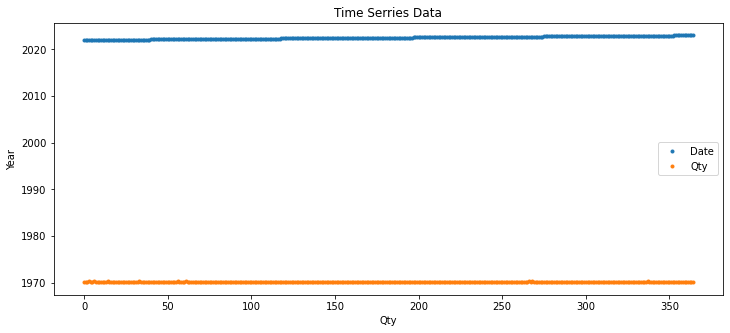

In [96]:
yearly_total_qty.plot(style='.', figsize=(12,5), title ='Time Serries Data')
plt.xlabel('Qty')
plt.ylabel('Year')
plt.legend(loc='best')
plt.show()


In [80]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_size = int(len(yearly_total_qty) * 0.8)  # 80% of data for training, change as needed
train, test = yearly_total_qty.iloc[:train_size], yearly_total_qty.iloc[train_size:]

order = (p, d, q)

model = ARIMA(train['Qty'], order=order)
results = model.fit()

In [81]:
predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

mae = mean_absolute_error(test['Qty'], predictions)
rmse = np.sqrt(mean_squared_error(test['Qty'], predictions))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 12.86909007232265
RMSE: 15.537574603141026


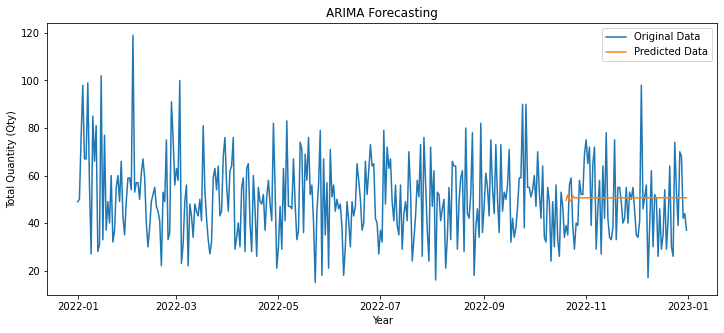

In [97]:
plt.figure(figsize=(12, 5))
plt.plot(yearly_total_qty['Date'], yearly_total_qty['Qty'], label='Original Data')
plt.plot(test['Date'], predictions, label='Predicted Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Quantity (Qty)')
plt.title('ARIMA Forecasting')
plt.show()